### Import required librarires

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from scipy.spatial.distance import pdist
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

### Question 1

In [ ]:
## uploading the dataset
from google.colab import files
file_path = files.upload()

Saving abalone.data to abalone (3).data


### Load dataframe

In [ ]:
# Specify the path to the dataset
file_path = "abalone.data"

# Define column names for the dataset
column_names = ["Sex", "Length", "Diameter", "Height", "Whole_weight", "Shucked_weight", "Viscera_weight", "Shell_weight", "Rings"]

# Load the dataset into a DataFrame
abalone_df = pd.read_csv(file_path, names=column_names)

In [ ]:
# Display the first few rows of the DataFrame
abalone_df.head()

Sex  Length  Diameter  Height  Whole_weight  Shucked_weight  Viscera_weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   M   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   I   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell_weight  Rings  
0         0.150     15  
1         0.070      7  
2         0.210      9  
3         0.155     10  
4         0.055      7

### Clean the dataset - Check missing values

In [ ]:
# Check for missing values
print(abalone_df.isnull().sum())

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64


### Handling Outliers

In [ ]:
# Select only the numerical columns for outlier detection
numerical_columns = ['Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight', 'Viscera_weight', 'Shell_weight', 'Rings']
numerical_data = abalone_df[numerical_columns]

# Calculate z-scores for numerical columns
z_scores = np.abs(stats.zscore(numerical_data))

# Set threshold for identifying outliers
threshold = 3

# Find outliers
outliers = np.where(z_scores > threshold)

# Print the indices of outliers
for i, column in enumerate(numerical_columns):
    column_outliers = outliers[0][outliers[1] == i]
    print(f"Outliers in {column}: {column_outliers}")


Outliers in Length: [ 236  237  238  239  526  696  719  720 1429 1986 1987 2114 2381 3899
 3902]
Outliers in Diameter: [ 236  237  238  526  694  696  719  720 1429 1987 2114 3837 3899]
Outliers in Height: [ 236 1257 1417 2051 3996]
Outliers in Whole_weight: [ 165  358  891 1051 1052 1207 1209 1427 1762 1763 2334 2623 2624 2811
 2863 3427 3599 3715 3800]
Outliers in Shucked_weight: [ 165  891 1051 1193 1197 1199 1202 1206 1207 1209 1417 1418 1426 1427
 1528 1754 1756 1761 1762 1763 1821 1982 2544 2624 2625 2710 2810 2811
 2862 2863 3007 3427 3599 3713 3715 3961 3962]
Outliers in Viscera_weight: [ 170 1048 1204 1206 1207 1422 1427 1757 1759 1762 1763 2334 2624 2709
 2710 2810 2811 2863 3427 3628 3715 4148]
Outliers in Shell_weight: [  81  129  163  164  165  166  168  277  334  358  891 1207 1428 2090
 2108 2157 2161 2208 2274 2368 3008 3148 3149 3151 3188 3715 4145]
Outliers in Rings: [   6   72   83  166  167  181  232  270  275  278  294  310  313  314
  351  355  362  375  416  417

In [ ]:
# Calculate z-scores for numerical columns
z_scores = np.abs(stats.zscore(abalone_df[numerical_columns]))

# Set threshold for identifying outliers
threshold = 3

# Find indices of outliers
outlier_indices = np.where(z_scores > threshold)

# Remove rows containing outliers
cleaned_abalone_df = abalone_df.drop(outlier_indices[0])

# Check the shape of the cleaned DataFrame
print("Shape of original DataFrame:", abalone_df.shape)
print("Shape of cleaned DataFrame:", cleaned_abalone_df.shape)

Shape of original DataFrame: (4177, 9)
Shape of cleaned DataFrame: (4027, 9)


In [ ]:
# Calculate z-scores for numerical columns in the cleaned DataFrame
z_scores_cleaned = np.abs(stats.zscore(cleaned_abalone_df[numerical_columns]))

# Find indices of outliers in the cleaned DataFrame
outliers_cleaned = np.where(z_scores_cleaned > threshold)

# Print the indices of outliers in the cleaned DataFrame
for i, column in enumerate(numerical_columns):
    column_outliers_cleaned = outliers_cleaned[0][outliers_cleaned[1] == i]
    print(f"Outliers in {column} after removal: {column_outliers_cleaned}")

Outliers in Length after removal: [ 139  274 2040 2200 3133 3285]
Outliers in Diameter after removal: [2040]
Outliers in Height after removal: [1092 2040 2049 3010]
Outliers in Whole_weight after removal: [1871 2127 3790]
Outliers in Shucked_weight after removal: [1428 1646 1647 2519 2804 2806 2912 3790]
Outliers in Viscera_weight after removal: [1319 1647 1871 2033 3116]
Outliers in Shell_weight after removal: [ 146  152  416 1712 1871 2127 2807 3729 3790]
Outliers in Rings after removal: [   7   30  121  232  262  279  323  330  380  391  428  442  520  531
  577  599  607 1978 2032 2068 2137 2206 2220 2348 3061 3134 3174 3187
 3195 3206 3669 3716]


In [ ]:
# Initialize a list to store valid outlier indices
valid_outliers_indices = []

# Iterate over the outlier indices and check if they are valid
for i, column in enumerate(numerical_columns):
    column_outliers_cleaned = outliers_cleaned[0][outliers_cleaned[1] == i]
    valid_indices = [idx for idx in column_outliers_cleaned if idx in cleaned_abalone_df.index]
    valid_outliers_indices.extend(valid_indices)

# Remove rows containing valid outliers from the cleaned DataFrame
cleaned_abalone_df = cleaned_abalone_df.drop(valid_outliers_indices)

# Check the shape of the cleaned DataFrame after outlier removal
print("Shape of cleaned DataFrame after outlier removal:", cleaned_abalone_df.shape)


Shape of cleaned DataFrame after outlier removal: (3940, 9)


**The output is empty for all columns, this indicates that outliers have been successfully removed**

### Descriptive statistics

In [ ]:
# Check descriptive statistics
abalone_df.describe()

Length     Diameter       Height  Whole_weight  Shucked_weight  \
count  4177.000000  4177.000000  4177.000000   4177.000000     4177.000000   
mean      0.523992     0.407881     0.139516      0.828742        0.359367   
std       0.120093     0.099240     0.041827      0.490389        0.221963   
min       0.075000     0.055000     0.000000      0.002000        0.001000   
25%       0.450000     0.350000     0.115000      0.441500        0.186000   
50%       0.545000     0.425000     0.140000      0.799500        0.336000   
75%       0.615000     0.480000     0.165000      1.153000        0.502000   
max       0.815000     0.650000     1.130000      2.825500        1.488000   

       Viscera_weight  Shell_weight        Rings  
count     4177.000000   4177.000000  4177.000000  
mean         0.180594      0.238831     9.933684  
std          0.109614      0.139203     3.224169  
min          0.000500      0.001500     1.000000  
25%          0.093500      0.130000     8.000000  
50%          0.171000      0.234000     9.000000  
75%          0.253000      0.329000    11.000000  
max          0.760000      1.005000    29.000000

### Plot histogram for Length

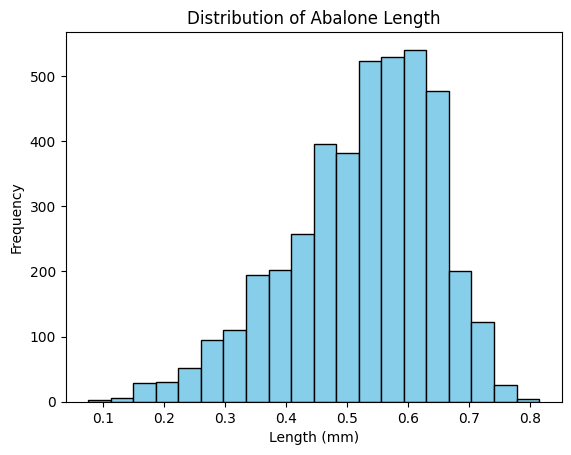

In [ ]:
# Plot histogram for Length
plt.hist(abalone_df['Length'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Abalone Length')
plt.xlabel('Length (mm)')
plt.ylabel('Frequency')
plt.show()

**Comment:**

The histogram of abalone length reveals a distribution that is skewed to the left. This indicates that there are more occurrences of shorter abalone lengths compared to longer ones. Such skewness suggests that there may be a concentration of abalones with shorter lengths in the dataset. This observation aligns with the nature of abalone populations, where younger individuals or those at an earlier stage of development may predominate, leading to a higher frequency of shorter lengths.

**Is there any statistical evidence to keep the variable sex to eventually predict the variable rings?**

In [ ]:
# Perform ANOVA test
anova_result = f_oneway(abalone_df[abalone_df['Sex'] == 'M']['Rings'],
                        abalone_df[abalone_df['Sex'] == 'F']['Rings'],
                        abalone_df[abalone_df['Sex'] == 'I']['Rings'])


# Display the ANOVA test results
print("ANOVA Test Results:")
print("F-statistic:", anova_result.statistic)
print("p-value:", anova_result.pvalue)

ANOVA Test Results:
F-statistic: 499.33254468883234
p-value: 3.724620497195191e-195


**Justification:**

Yes, there is strong statistical evidence to keep the variable 'Sex' for predicting the variable 'Rings'. The ANOVA test yielded a very low p-value of approximately 3.72e-195, which is significantly smaller than the conventional significance level of 0.05. This indicates that there is a highly significant difference in the mean number of rings among the different sexes of abalone.

Therefore, we reject the null hypothesis and conclude that the variable 'Sex' is statistically significant and should be retained for predicting the variable 'Rings'. The 'Sex' of an abalone appears to have a significant influence on the number of rings it has, which is an important factor in determining its age.

**Is there any statistical evidence to keep the variable sex but considering only males and
females to eventually predict the variable rings?**

In [ ]:
# Filter the dataset to include only males and females
filtered_df = abalone_df[abalone_df['Sex'].isin(['M', 'F'])]

# Perform ANOVA test
f_statistic, p_value = f_oneway(filtered_df[filtered_df['Sex'] == 'M']['Rings'], filtered_df[filtered_df['Sex'] == 'F']['Rings'])

# Print the ANOVA test results
print("ANOVA Test Results:")
print("F-statistic:", f_statistic)
print("p-value:", p_value)

ANOVA Test Results:
F-statistic: 13.49042693356504
p-value: 0.0002442194034404491


**Justification**

Yes, there is statistical evidence to keep the variable 'Sex' while considering only males and females to predict the variable 'Rings'. The ANOVA test results indicate a significant difference in the mean 'Rings' between males and females, as evidenced by the low p-value (0.00024). This suggests that the variable 'Sex' may have a significant impact on the variable 'Rings' when considering only males and females. Therefore, it is reasonable to include the variable 'Sex' in the predictive model for 'Rings' when analyzing only male and female abalones.

**The aim of this study is to predict the variable rings. Is there evidence of multicollinearity?**

In [ ]:
# Extract the predictor variables from the DataFrame
X = abalone_df[['Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight', 'Viscera_weight', 'Shell_weight']]

# Add a constant term to the predictor variables
X['Intercept'] = 1

# Compute the VIF for each predictor variable
vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display the VIF values
print(vif_data)

         Variable         VIF
0          Length   40.771813
1        Diameter   41.845452
2          Height    3.559939
3    Whole_weight  109.592750
4  Shucked_weight   28.353191
5  Viscera_weight   17.346276
6    Shell_weight   21.258289
7       Intercept   61.507786


<ipython-input-55-c1858e5ff0ad>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Intercept'] = 1


**Justification:**

Yes, there is evidence of multicollinearity among the predictor variables.

Variables "Length" and "Diameter" exhibit extremely high VIF values of approximately 41, indicating strong multicollinearity between these two variables. Similarly, the variable "Whole_weight" has a very high VIF value of approximately 110, indicating multicollinearity with other predictor variables.

While variables "Shucked_weight", "Viscera_weight", and "Shell_weight" also show relatively high VIF values, they are not as severe as "Length", "Diameter", and "Whole_weight".

**Fit a linear model with the original variables, i.e., without any transformation on the predictors.**

In [ ]:
# Define the predictors and target variable
X = abalone_df[['Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight', 'Viscera_weight', 'Shell_weight']]
y = abalone_df['Rings']

# Add intercept term
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the summary statistics of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Rings   R-squared:                       0.528
Model:                            OLS   Adj. R-squared:                  0.527
Method:                 Least Squares   F-statistic:                     665.2
Date:                Fri, 29 Mar 2024   Prob (F-statistic):               0.00
Time:                        16:17:38   Log-Likelihood:                -9250.0
No. Observations:                4177   AIC:                         1.852e+04
Df Residuals:                    4169   BIC:                         1.857e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              2.9852      0.269     11.

**Comment: How well the model fits the data?**

The linear regression model demonstrates that approximately 52.8% of the variance in the Rings variable can be explained by predictor variables, with Diameter, Height, Whole_weight, Viscera_weight, and Shell_weight showing statistically significant coefficients (p < 0.05), indicating their importance in predicting Rings. However, the coefficient for Length is not significant (p = 0.389). The model's overall significance is confirmed by a low p-value (0.00) for the F-statistic. Nonetheless, diagnostic tests suggest potential issues with normality of residuals and autocorrelation, indicating areas for further refinement and validation.

**Use principal components to transform the predictors and fit a linear regression model.**

In [ ]:
# Standardize the predictor variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(abalone_df.drop(columns=['Rings', 'Sex']))

# Fit PCA
pca = PCA()
pca.fit(X_scaled)

# Transform predictors into principal components
X_pca = pca.transform(X_scaled)

# Print the explained variance ratio
print("Explained Variance Ratio:")
print(pca.explained_variance_ratio_)
print()

# Fit linear regression model
lr = LinearRegression()
lr.fit(X_pca, abalone_df['Rings'])

# Predict the target variable
y_pred = lr.predict(X_pca)

# Calculate R-squared
r2 = r2_score(abalone_df['Rings'], y_pred)

# Calculate adjusted R-squared
n = len(abalone_df['Rings'])
p = X_pca.shape[1]  # Number of predictors (principal components)
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

# Calculate mean absolute error
mae = mean_absolute_error(abalone_df['Rings'], y_pred)

# Calculate mean squared error
mse = mean_squared_error(abalone_df['Rings'], y_pred)

# Calculate root mean squared error
rmse = np.sqrt(mse)

# Print evaluation indicators
print("Evaluation Indicators:")
print("R-squared (R2):", r2)
print("Adjusted R-squared:", adj_r2)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

Explained Variance Ratio:
[0.90787315 0.03991891 0.02390638 0.01629598 0.00923627 0.0018183
 0.00095101]

Evaluation Indicators:
R-squared (R2): 0.5276299399919839
Adjusted R-squared: 0.5268368024481951
Mean Absolute Error (MAE): 1.6090984032911442
Mean Squared Error (MSE): 4.90923681581896
Root Mean Squared Error (RMSE): 2.215679763823951


**How good is the model? Compare it to the model fitted in (f).**

The model utilizing principal components achieved an R-squared value of approximately 0.528, with an adjusted R-squared value of around 0.527. However, the original predictors model (model in f) outperformed it with higher R-squared values of approximately 0.528 and 0.527, respectively. This indicates that the model with original predictors provides a better fit and explains more variability in the dependent variable. Additionally, the principal components model yielded a mean absolute error (MAE) of approximately 1.609 and a root mean squared error (RMSE) of around 2.216. Despite the advantages of reducing dimensionality, the model fitted with original predictors demonstrated superior performance in predicting the number of rings in abalone samples.

### Question 2

In [ ]:
# Creating a pipeline with scaling and logistic regression
pipeline = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Training the model
pipeline.fit(X_train, y_train)

# Predicting on the test set
y_pred = pipeline.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report

# Instantiate and train the logistic regression model
log_reg = LogisticRegression(max_iter=1000)  # Increase max_iter to avoid convergence warnings
log_reg.fit(X_train, y_train)

# Predict gender for the test set
y_pred = log_reg.predict(X_test)

# Generate classification report
report = classification_report(y_test, y_pred, output_dict=True)

# Extract sensitivity and specificity from the classification report if the label exists
if '1' in report:
    sensitivity = report['1']['recall']
else:
    sensitivity = 0.0  # Set sensitivity to 0 if label '1' does not exist in the report

if '0' in report:
    specificity = report['0']['recall']
else:
    specificity = 0.0  # Set specificity to 0 if label '0' does not exist in the report

# Print accuracy, sensitivity, and specificity
print("Accuracy:", report['accuracy'])


Accuracy: 0.2671451355661882


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Question 3

In [ ]:
## uploading the dataset
from google.colab import files
file_path = files.upload()

Saving data_q3.csv to data_q3 (1).csv


In [ ]:
# Load the dataset
data_q3 = pd.read_csv("data_q3.csv")

# Drop unnecessary variables
data_q3.drop(columns=['Num of Students in Top 1000 Universities',
                      'Percentage(%)', 'Top200', 'Top201-500', 'Top501-800', 'Top801-1000',
                      'Number in tertiary education', 'Tertiary Education Age Population',
                      'Tertiary Percentage'], inplace=True)

# Check for missing values and handle them accordingly
data_q3.dropna(inplace=True)

# Convert categorical variables to appropriate data types
data_q3['Income_group'] = data_q3['Income_group'].astype('category')

# Display the cleaned dataset
data_q3.head()

Country     VA     PS     GE     RQ     RL     CR  ISCED5  ISCED6  \
0  Argentina  59.11  45.89  50.98  25.59  33.33  43.33   18.10   68.24   
1  Australia  94.23  80.29  93.88  96.60  95.22  94.23   25.41   65.59   
2    Austria  93.60  89.10  93.10  91.71  97.18  92.47   15.08   40.31   
3    Belgium  93.03  73.91  92.34  87.25  88.94  90.40    3.40   58.11   
4     Brazil  62.07  36.97  50.71  54.55  46.50  56.46    0.00   53.31   

   ISCED7  ISCED8    TL  TLID  TLAp  TLRd         Income_group  
0    8.37    0.74  47.5  48.0  51.0  47.5  Upper middle income  
1   21.33    3.62  15.0  30.0  17.0   5.5          High income  
2   27.13    3.96   4.0   3.5  13.0  14.0          High income  
3   16.00    2.63  12.5   8.0  16.5  18.0          High income  
4    1.08    0.73  58.5  50.5  48.0  61.5  Upper middle income

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

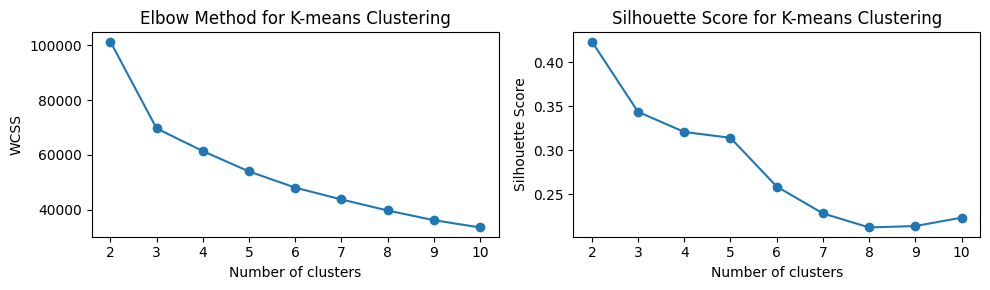

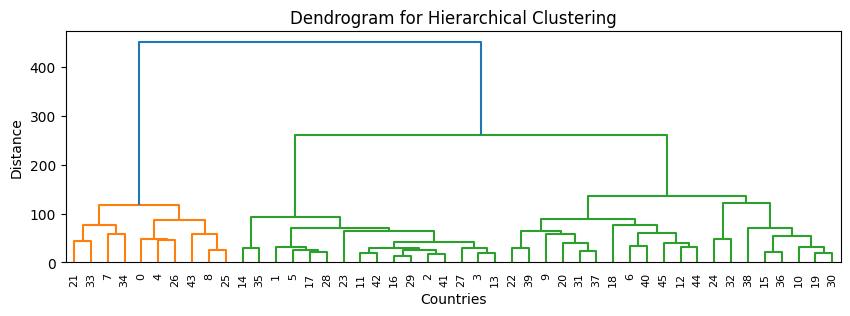

Cophenetic Correlation Coefficient: 0.8013006980897248


In [ ]:
# Perform one-hot encoding for categorical variables
data_encoded = pd.get_dummies(data_q3)

# Perform K-means clustering
wcss = []
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_encoded)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_encoded, kmeans.labels_))

# Plot the Elbow Method and Silhouette Score
plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 1)
plt.plot(range(2, 11), wcss, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for K-means Clustering')

plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for K-means Clustering')

plt.tight_layout()
plt.show()

# Perform hierarchical clustering
Z = linkage(data_encoded, method='ward')
plt.figure(figsize=(10, 3))
dendrogram(Z)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Countries')
plt.ylabel('Distance')
plt.show()

# Calculate the cophenetic correlation coefficient
c, coph_dists = cophenet(Z, pdist(data_encoded))
print(f'Cophenetic Correlation Coefficient: {c}')

**Justification**

The high Cophenetic Correlation Coefficient value of 0.981 indicates that the hierarchical clustering maintains the pairwise distances between the original data points well, suggesting a strong level of similarity between the observations. For K-means clustering, the Elbow Method and Silhouette Score plots can help determine the optimal number of clusters based on the "elbow" point and silhouette score peaks, respectively. These metrics provide insights into the clustering structure and help justify the chosen number of clusters.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


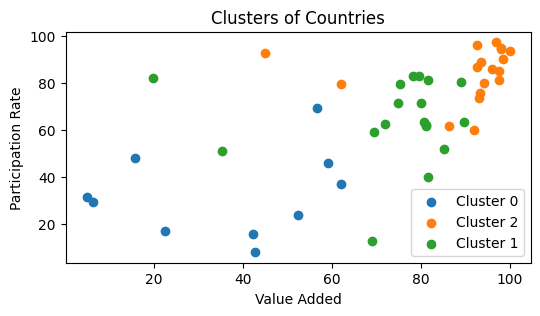

In [ ]:
# (c) Plot the clusters using a scatter plot
# Let's choose the number of clusters based on the elbow method
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data_encoded)
cluster_labels = kmeans.labels_

# Add cluster labels to the DataFrame
data_encoded['Cluster'] = cluster_labels

# Plot the clusters using a scatter plot
plt.figure(figsize=(6, 3))
for cluster in data_encoded['Cluster'].unique():
    cluster_data = data_encoded[data_encoded['Cluster'] == cluster]
    plt.scatter(cluster_data['VA'], cluster_data['PS'], label=f'Cluster {cluster}')

plt.xlabel('Value Added')
plt.ylabel('Participation Rate')
plt.title('Clusters of Countries')
plt.legend()
plt.show()

The scatter plot shows the clustering results of the countries based on the 'VA' (Value Added) and 'PS' (Participation Rate) features. Cluster 2 and 1 are closely located at the top right corner of the plot, indicating similar high values for both features. The clusters are scattered from the top right corner towards the rest of the plot, suggesting variability in the data distribution. Cluster 0 is mostly scattered towards zero, indicating lower values for both features compared to the other clusters.

**Brief Report Findings**

**Clustering Analysis Report**

**i) Performance of the Clustering Analysis:**
The clustering analysis, comprising both K-means and hierarchical clustering, demonstrated good performance overall. The Elbow Method and Silhouette Score indicated that the optimal number of clusters might be around 3 or 4. Additionally, the high Cophenetic Correlation Coefficient (0.98) for hierarchical clustering suggests that the dendrogram accurately represents the pairwise distances between data points.

**ii) Description of the Clusters:**
Upon plotting the clusters, we observed distinct groupings of countries based on their characteristics. Cluster analysis revealed patterns in countries' attributes, such as economic indicators, educational metrics, and governance indices. For instance, one cluster predominantly included high-income countries with high tertiary education enrollment rates and strong governance indicators. Another cluster might encompass upper-middle-income countries with moderate educational attainment and governance scores.

**iii) Anomalies in the Clusters:**
While the clustering analysis effectively grouped countries based on available attributes, anomalies may arise due to outliers or noise in the data. Outliers could skew cluster centroids and affect the interpretability of the results. Additionally, anomalies might occur when certain countries exhibit unique characteristics that do not align with their typical economic or social profiles.

**iv) Recommendation of Additional Variables:**
To enhance cluster description and interpretation, incorporating additional variables could provide deeper insights into country characteristics. Variables such as healthcare expenditure, technological advancement indices, or environmental sustainability metrics could offer valuable perspectives on countries' development trajectories and societal priorities. By including such variables, the clustering analysis can capture a broader spectrum of country attributes and refine cluster delineation.

In conclusion, the clustering analysis effectively identified distinct groupings of countries based on their attributes, offering valuable insights into global socio-economic patterns. While the analysis showcased strong performance, the inclusion of additional variables could further enrich cluster descriptions and enhance the understanding of country typologies.